<h1> Cars Price Prediction Case Study by Simranjeet Singh</h1>

<h3>Problem: Build a model to Predict prices of Second Hand Cars</h3>

<h2>Variables:<br>
1:dateCrawled - Date when the ad was first crawled, all field values are taken from this date. <br>	
2:name - Name of the car<br>	
3:seller -Type of seller( Private or commercial ) <br>
4:offerType -Whether the car is on offer or the buyer has Requested for an offer. <br>
5:price - Price on the ad to sell the car.<br>	
6:abtest - two version of the ad.<br>
7:vehicleType - Type of vehicle.<br>
8:yearOfRegistration - Year in which it was First Registered<br>
9:gearbox - Type of Gearbox ( Manual or Automatic ) <br>
10:powerPS - Power of the Car(HP)<br>
11:model - Model Type of the Car.<br>
12:kilometer - Number of Kilometer car has Travelled.<br>
13:monthOfRegistration - Month of Registration of the car. <br>
14:fuelType - Type of fuel<br>
15:brand - Make of the Car<br>
16:notRepairedDamage - Status of repair of Damage( if yes damage has not been recitified, if No damages have been taken care of.<br>
17:dateCreated - Date at which ad was created <br>
18:postalCode -  Postal Code of the Seller<br>
19:lastSeen - When the crawler Saw this ad last online.<br>


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [2]:
#loading the Dataset
cars=pd.read_csv("cars_sampled.csv")
data=cars.copy(deep=True)

In [3]:
#Summary of the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [4]:
#Dropping the Unwanted Columns
data=data.drop(columns=['dateCrawled','name','dateCreated','postalCode','lastSeen'],axis=1)
print(data.columns)

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')


In [10]:
#Checking Columnwise Null Percentage
null_percentage=data.isnull().sum()
null_percentage=(null_percentage/len(data))*100
null_percentage=round(null_percentage,2)
print(null_percentage)

seller                  0.00
offerType               0.00
price                   0.00
abtest                  0.00
vehicleType            10.38
yearOfRegistration      0.00
gearbox                 5.65
powerPS                 0.00
model                   5.52
kilometer               0.00
monthOfRegistration     0.00
fuelType                9.01
brand                   0.00
notRepairedDamage      19.43
dtype: float64


In [16]:
#Getting columns with null percentage > 5
print(null_percentage.loc[null_percentage>5])

vehicleType          10.38
gearbox               5.65
model                 5.52
fuelType              9.01
notRepairedDamage    19.43
dtype: float64


In [22]:
#Dropping Null Values from by selecting columns where null_percentage > 5
data.dropna(subset=["vehicleType","gearbox","model","fuelType","notRepairedDamage"],inplace=True)

In [67]:
#checking percentage of rows retained
print(len(data))
print("Percentage of rows Retained",(len(data)/len(cars))*100)

35107
Percentage of rows Retained 70.21259574808504


<h2>Checkpoint 1: 70% of data is retained after dropping the null values</h2>

<h3> Univariate Analysis</h3>

In [25]:
##### Function to perform Univariate Analysis
def Univariate(self):
    if data[self].dtype=="int":
        print(data[self].value_counts().sort_index())
        print(data[self].unique())
        print(data[self].describe())
        
    elif data[self].dtype=="float":
        print(data[self].value_counts().sort_index())
        print(data[self].unique())
        print(data[self].describe())
       
    else:
        print(data[self].value_counts())
        print(data[self].unique())
        print(data[self].describe())
       

In [ ]:
#Analyzing Price
Univariate("price")
sns.boxplot(y=data["price"])
plt.ticklabel_format(style='plain',axis="y")
plt.show()
sns.distplot(data["price"])
plt.ticklabel_format(style='plain')
plt.show()

<h4>Price is more focused towards 0 and there are outliers so we need to set up a working range</h4>

In [89]:
sum(data["price"]<100)

0

In [90]:
sum(data["price"]>150000)

0

<b>Working Range of Price is `$`100 - `$`150000</b>

In [ ]:
#Setting working Range of price
data=data[(data.price>100)&(data.price<150000)]

<b>~540 rows dropped</b>

private       35106
commercial        1
Name: seller, dtype: int64
['private' 'commercial']
count       35107
unique          2
top       private
freq        35106
Name: seller, dtype: object


C:\Users\sjsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


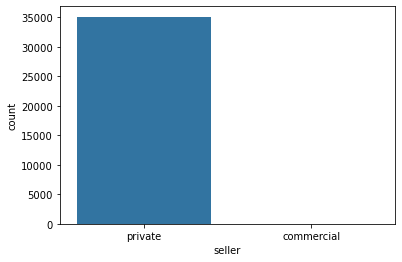

In [30]:
#Analyzing Seller
Univariate("seller")
sns.countplot(data['seller'])
plt.show()

<h4> 99.9% sellers are private so Seller seems to be insignificant</h4>

offer      35106
request        1
Name: offerType, dtype: int64
['offer' 'request']
count     35107
unique        2
top       offer
freq      35106
Name: offerType, dtype: object


C:\Users\sjsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='offerType', ylabel='count'>

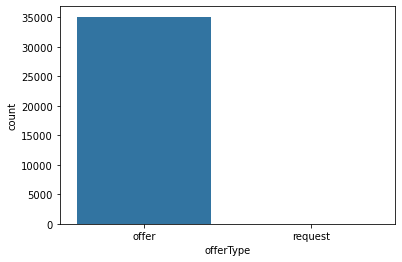

In [31]:
#Analyzing OfferType
Univariate("offerType")
sns.countplot(data["offerType"])

<h4>99.9% OfferType are offer so Offertype seems to be insignificant</h4>

test       18161
control    16946
Name: abtest, dtype: int64
['control' 'test']
count     35107
unique        2
top        test
freq      18161
Name: abtest, dtype: object


C:\Users\sjsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


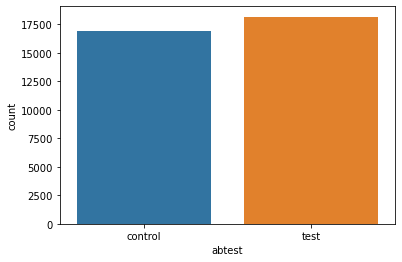

In [62]:
#Analyzing ABtest
Univariate("abtest")
sns.countplot(data["abtest"])
plt.show()

Both Control and Test are almost equally Distributed  so ABtest might be Significant.

limousine        10378
small car         7994
station wagon     7137
bus               3315
cabrio            2443
coupe             1981
suv               1628
others             231
Name: vehicleType, dtype: int64
['suv' 'small car' 'limousine' 'coupe' 'station wagon' 'cabrio' 'bus'
 'others']
count         35107
unique            8
top       limousine
freq          10378
Name: vehicleType, dtype: object


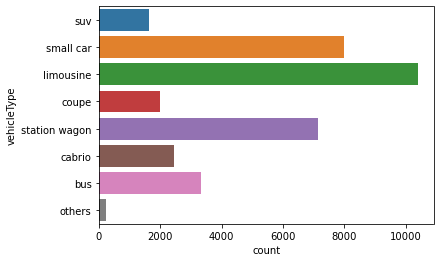

In [84]:
#Analyzing VehicleType
Univariate("vehicleType")
sns.countplot(y=data["vehicleType"])
plt.show()


<b>Vehicle Type is distributed among all options, limousine is the most listed followed by small car and station wagon, hence vehicle Type might be Significant.</b>

manual       26895
automatic     8212
Name: gearbox, dtype: int64
['manual' 'automatic']
count      35107
unique         2
top       manual
freq       26895
Name: gearbox, dtype: object


C:\Users\sjsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gearbox', ylabel='count'>

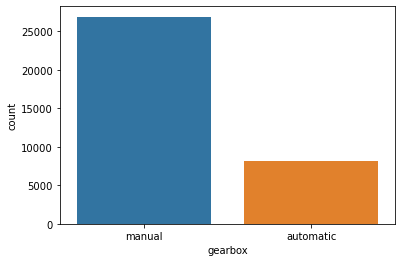

In [69]:
#Analyzing Gearbox
Univariate("gearbox")
sns.countplot(data["gearbox"])

<b>Both Manual and Automatic gearbox have significant number of values so gearbox might be significant</b>